In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
#Importando os dados do tipo "csv" utilizando a biblioteca pandas
df = pd.read_csv("C://Users//Demer//Downloads//ProjetoPIBIC//DadosAlunos.csv", delimiter=';')
df.head()

,1-DIREC,2-Município,3-Etapa de Ensino,4-Série,5-Turno,6-Situação,7-Sexo,8-Estado Civil,9-Tipo Sanguíneo,10-Município de Naturalidade,...,22-Grau de Instrução da Mãe,23-Renda mensal da Família,24-Você estudava nessa escola no ano anterior?,25-Quais livros você mais lê?,26-Seu acesso a Internet se dá,27-Você trabalha?,28-Caso você trabalhe qual o Tipo de trabalho?,29-Caso você trabalhe quanto tempo você dedica ao Trabalho?,30-No último ano escolar quantas vezes você frequentava à aula,31-Que representava para você a escola?
0,1,1,1,1,1,1,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,3,...,6,1,2,7,5,2,0,0,4,2
2,1,1,1,1,1,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,2,1,0,3,...,5,1,2,5,2,2,0,0,3,2


In [2]:
#Excluindo tabelas que não terão impactos nos resultados finais
df.drop('1-DIREC', axis=1, inplace=True)
df.drop('10-Município de Naturalidade', axis=1, inplace=True)
df.drop('31-Que representava para você a escola?', axis=1, inplace=True)

In [3]:
#Padronizando os dados, transformando os dados tipo "string" em tipo "int"
df['15-Tipo de Residencia em que você mora'].replace('Outro', '5', inplace=True)
df['20-Meio de transporte que mais utiliza'].replace('Outro', '7', inplace=True)
df['22-Grau de Instrução da Mãe'].replace('Analfabeta', '9', inplace=True)
df['23-Renda mensal da Família'].replace('Mais de 10 até 20 salários mínimos', '5', inplace=True)
df['23-Renda mensal da Família'].replace('Mais de 20 salários mínimos', '6', inplace=True)
df['29-Caso você trabalhe quanto tempo você dedica ao Trabalho?'].replace('Outro', '8', inplace=True)

In [4]:
#Definindo os valores "x" e "y"
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [5]:
#Verificando se todos os dados são do tipo "int" e quantas vezes o mesmo dado se repete
np.unique(y, return_counts=True)

(array([1, 2, 3], dtype=int64), array([17259,  8580, 14254], dtype=int64))

In [6]:
#Definindo o XTain, XTest, yTrain, yTest
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

from sklearn.preprocessing import StandardScaler
scale_obj = StandardScaler()
X = scale_obj.fit_transform(X.astype(float))

from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [7]:
#Testando o tempo de execução
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
start_time = time.perf_counter()
model.fit(XTrain, yTrain)
end_time = time.perf_counter()

print("Tempo de treino:", end_time - start_time)

Tempo de treino: 0.5074830000000929


In [8]:
#Importando o t-SNE da biblioteca "sklearn.manifold"
from sklearn.manifold import TSNE
#Definindo a quantidade de dimensões para qual o conjunto de dados será reduzido e executando o t-SNE
tsne = TSNE(n_components=2, random_state=0)
#Artribuindo o resultado do redimensinalização a variável PC
PC = tsne.fit_transform(XTrain)

In [9]:
#Mostrando o resultados
PC

array([[-15.0263   , -61.902378 ],
       [ -6.363866 ,  24.82445  ],
       [ -9.530024 ,   2.1506758],
       ...,
       [-74.39469  ,  14.584564 ],
       [ 48.912754 ,  11.608273 ],
       [-67.497795 ,  19.652485 ]], dtype=float32)

In [10]:
#Mostrando os resultados em forma de tabela
PC_df = pd.DataFrame(data = PC, 
                        columns = ['principal component 1', 'principal component 2'])

PC_df

,principal component 1,principal component 2
0,-15.026300,-61.902378
1,-6.363866,24.824450
2,-9.530024,2.150676
3,29.925861,-1.023272
4,4.142518,-29.016926
...,...,...
32069,31.433636,-2.952418
32070,70.239067,1.544812
32071,-74.394691,14.584564
32072,48.912754,11.608273


In [11]:
#Transformando os dados para facilitar a plotagem gráfica
yTrain.astype(int)
yTrain = np.where(yTrain == 0, 'Ensino Fundamental I', yTrain)
yTrain = np.where(yTrain == '1', 'Ensino Fundamental II', yTrain)
yTrain = np.where(yTrain == '2', 'Ensino Médio', yTrain)

<Figure size 432x288 with 0 Axes>

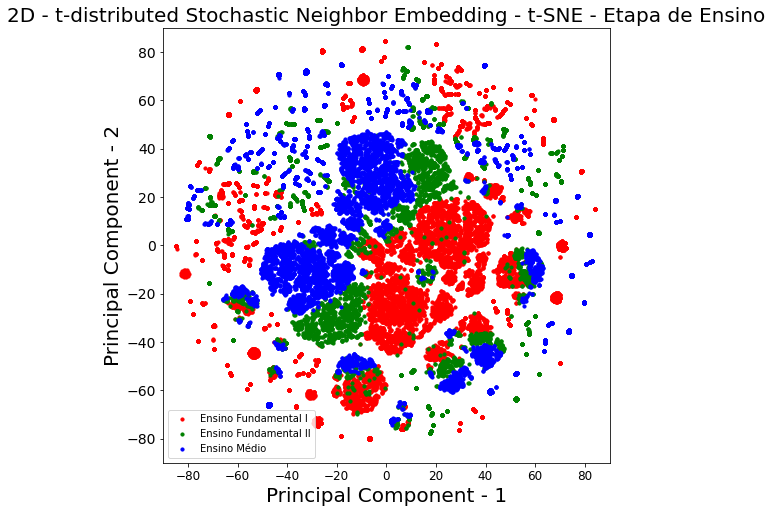

In [15]:
#Plotando um gráfico 2D com todas as etapas do ensino
plt.figure()
plt.figure(figsize=(8,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.xlim(-90, 90)
plt.ylim(-90, 90)
plt.title("2D - t-distributed Stochastic Neighbor Embedding - t-SNE - Etapa de Ensino",fontsize=20)
targets = ['Ensino Fundamental I', 'Ensino Fundamental II', 'Ensino Médio']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = yTrain == target
    plt.scatter(PC_df.loc[indicesToKeep, 'principal component 1'], 
                PC_df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 10, alpha=1)

plt.legend(targets,prop={'size': 10})
plt.show()

<Figure size 432x288 with 0 Axes>

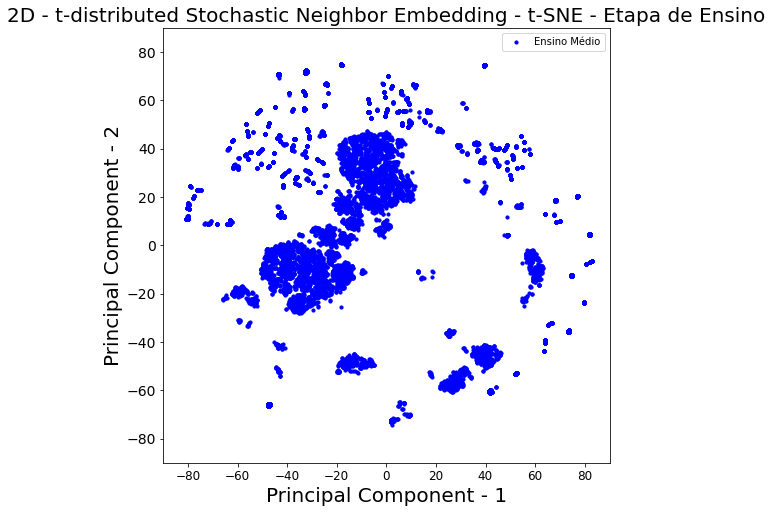

In [16]:
#Plotando um gráfico 2D somente com o ensino médio
plt.figure()
plt.figure(figsize=(8,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.xlim(-90, 90)
plt.ylim(-90, 90)
plt.title("2D - t-distributed Stochastic Neighbor Embedding - t-SNE - Etapa de Ensino",fontsize=20)
targets = ['Ensino Médio']
colors = ['b']

for target, color in zip(targets,colors):
    indicesToKeep = yTrain == target
    plt.scatter(PC_df.loc[indicesToKeep, 'principal component 1'], 
                PC_df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 10, alpha=1)

plt.legend(targets,prop={'size': 10})
plt.show()

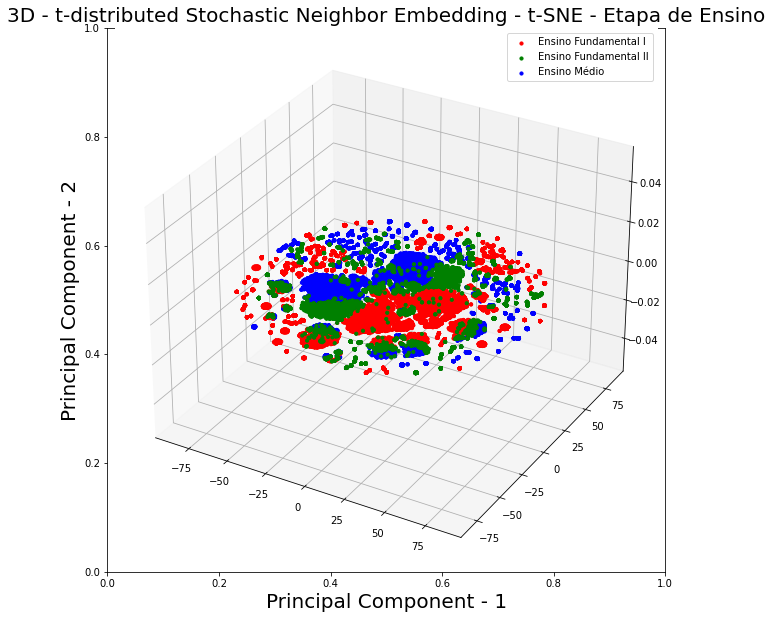

In [17]:
#Plotando um gráfico 3D com todas as etapas do ensino
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
 
axis = fig.add_subplot(111, projection='3d')
 
plt.title("3D - t-distributed Stochastic Neighbor Embedding - t-SNE - Etapa de Ensino",fontsize=20)
targets = ['Ensino Fundamental I', 'Ensino Fundamental II', 'Ensino Médio']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = yTrain == target
    axis.scatter(PC_df.loc[indicesToKeep, 'principal component 1'], 
                PC_df.loc[indicesToKeep, 'principal component 2'],  
                c = color, s = 10, alpha=1)

plt.legend(targets,prop={'size': 10})
plt.show()

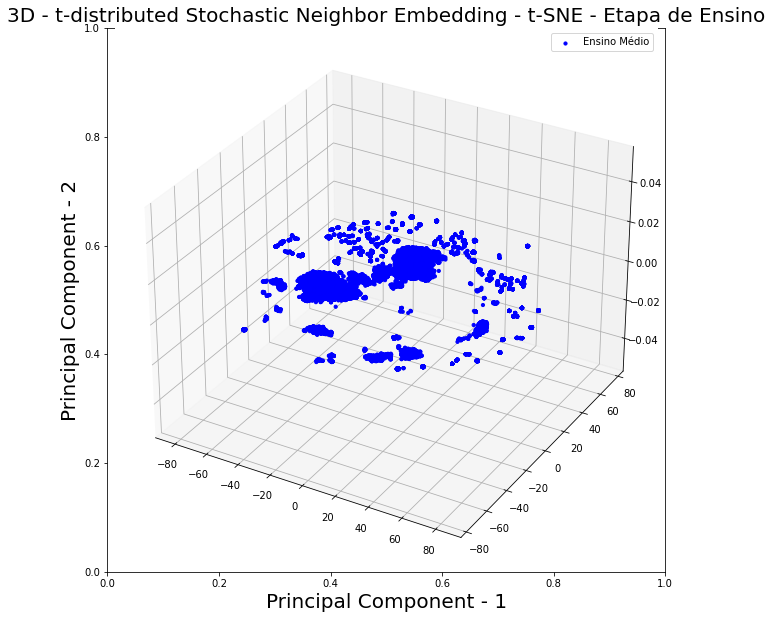

In [19]:
#Plotando um gráfico 3D somente com o ensino médio
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
 
axis = fig.add_subplot(111, projection='3d')
 
plt.title("3D - t-distributed Stochastic Neighbor Embedding - t-SNE - Etapa de Ensino",fontsize=20)
targets = ['Ensino Médio']
colors = ['b']

for target, color in zip(targets,colors):
    indicesToKeep = yTrain == target
    axis.scatter(PC_df.loc[indicesToKeep, 'principal component 1'], 
                PC_df.loc[indicesToKeep, 'principal component 2'],  
                c = color, s = 10, alpha=1)

plt.legend(targets,prop={'size': 10})
plt.show()

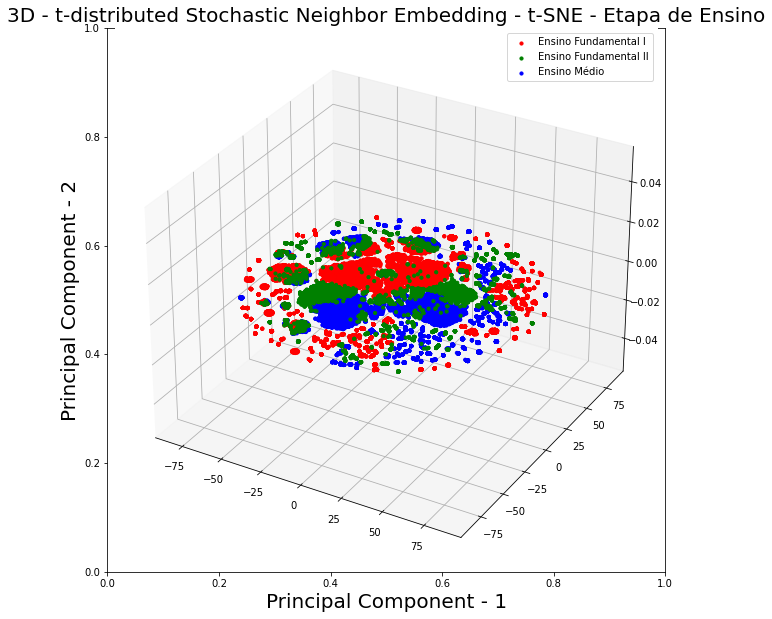

In [18]:
#Plotando um gráfico 3D com todas as etapas do ensino por outro ângulo para facilitar a análise
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
 
axis = fig.add_subplot(111, projection='3d')
 
plt.title("3D - t-distributed Stochastic Neighbor Embedding - t-SNE - Etapa de Ensino",fontsize=20)
targets = ['Ensino Fundamental I', 'Ensino Fundamental II', 'Ensino Médio']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = yTrain == target
    axis.scatter(PC_df.loc[indicesToKeep, 'principal component 2'], 
                PC_df.loc[indicesToKeep, 'principal component 1'],  
                c = color, s = 10, alpha=1)

plt.legend(targets,prop={'size': 10})
plt.show()